In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '../src/')
import utils as ut
import avida as avida
import evals as evals

In [2]:
def circle(n, r, sigma):
    theta = np.random.rand(n) * 2 * np.pi
    radius = np.random.randn(n) * sigma + r
    X = np.empty([n,2])
    X[:,0] = np.cos(theta) * radius
    X[:,1] = np.sin(theta) * radius
    return X

n = 200
m = 200
np.random.seed(547)

our_normalize=0

r1 = 5
r2 = 5

sigma1 = 1
sigma2 = 0.1 

center2 = 100

circle1 = circle(100,r1,sigma1)
circle2 = circle(100,r2,sigma2) + center2

X1 = np.zeros([n,2])
X1[:100,:] = circle1
X1[100:,:] = circle2

X2 = np.zeros([m,2])
X2[:100,:] = circle1
X2[100:,:] = circle2

labels_1 = np.zeros(m)
labels_1[100:] = np.ones(100)
labels_2 = np.zeros(n)
labels_2[100:] = np.ones(100)

In [3]:
Y1, Y2 = avida.avida_tsne(X1,X2,alpha=0.9,normalize=our_normalize,visualize=0,labels1=labels_1,labels2=labels_2,graph_dist=True)

rings_FOSCTTM_avida = np.mean(evals.calc_domainAveraged_FOSCTTM(Y1, Y2))
rings_integration_avida = evals.integration_score(Y1,Y2)
rings_vision_loss_avida = evals.vis_loss(X1,X2,Y1,Y2,our_normalize)
rings_alignment_avida = evals.test_alignment_score(Y1,Y2)
rings_accuracy_avida = evals.test_transfer_accuracy(Y1, Y2, labels_1, labels_2)
rings_accuracy_ours_avida = evals.our_accuracy(Y1, Y2)

print('AVIDA FOSCTTM score: '+str(rings_FOSCTTM_avida))
print('AVIDA Integration score: '+str(rings_integration_avida))
print('AVIDA t-SNE Loss: '+str(rings_vision_loss_avida))
print('AVIDA Alignment Score: '+str(rings_alignment_avida))
print('AVIDA Accuracy: '+str(rings_accuracy_avida))
print('AVIDA Our Accuracy: '+str(rings_accuracy_ours_avida))

Computing pairwise distances...
Computing P-values for point 0 of 200...
Mean value of sigma: 3.037966
Computing pairwise distances...
Computing P-values for point 0 of 200...
Mean value of sigma: 3.037966
Iteration 100: error is 16.918709
Iteration 200: error is 16.955823
Iteration 300: error is 0.380802
It.  |Err         
-------------------
    0|4.847213e-03|
   10|4.211822e-03|
   20|3.413663e-03|
   30|1.216769e-03|
   40|1.107978e-03|
   50|1.538254e-04|
   60|1.041021e-04|
   70|7.096834e-05|
0.029335143507901677
Iteration 400: error is 0.468579
It.  |Err         
-------------------
    0|4.792202e-03|
   10|3.966378e-03|
   20|2.721966e-03|
   30|1.378535e-03|
   40|8.078893e-04|
   50|5.840097e-04|
   60|5.355114e-04|
   70|2.204942e-04|
   80|1.275116e-04|
   90|4.950689e-05|
0.029104560713795725
Iteration 500: error is 0.391048
It.  |Err         
-------------------
    0|4.789383e-03|
   10|4.867880e-03|
   20|2.593314e-03|
   30|2.234559e-03|
   40|5.424506e-04|
   50|6.

Text(0.5, 1.0, 'AVIDA: Colored by Domain')

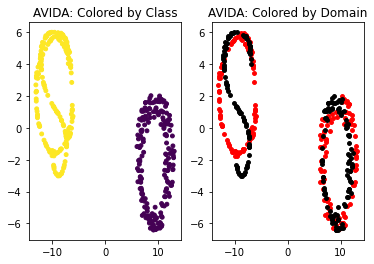

In [6]:
fig, axs = plt.subplots(1,2)

axs[0].scatter(Y2[:,0],Y2[:,1],c=labels_1,s=15)
axs[0].scatter(Y1[:,0],Y1[:,1],c=labels_2,s=15)
axs[0].set_title("AVIDA: Colored by Class")

axs[1].scatter(Y2[:,0],Y2[:,1],c='r',s=15)
axs[1].scatter(Y1[:,0],Y1[:,1],c='k',s=15)
axs[1].set_title("AVIDA: Colored by Domain")